In [30]:
import cv2


In [31]:
import numpy as np


In [3]:
!pip install pypiwin32

In [4]:
!pip install pyttsx3

In [5]:
import pyttsx3

In [6]:
with_mask = np.load('with_mask.npy')
without_mask = np.load('without_mask.npy')

In [7]:
with_mask.shape


(200, 50, 50, 3)

In [8]:
without_mask.shape


(200, 50, 50, 3)

In [9]:
with_mask = with_mask.reshape(200,50*50*3)
without_mask = without_mask.reshape(200,50*50*3)

In [10]:
with_mask.shape

(200, 7500)

In [11]:
without_mask.shape


(200, 7500)

In [12]:
X = np.r_[with_mask,without_mask]

In [13]:
X.shape


(400, 7500)

In [14]:
labels= np.zeros(X.shape[0])


In [15]:
labels[200:]=1.0

In [16]:
names = {0:'Mask', 1:'No-Mask'}

In [17]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X,labels,test_size=0.25)

In [20]:
x_train.shape


(300, 7500)

In [21]:
from sklearn.decomposition import PCA
# principal component analysis

In [22]:
pca = PCA(n_components = 3)
x_train = pca.fit_transform(x_train)

In [23]:
x_train[0]

array([4907.98010151, 5278.82331993, 2702.49822363])

In [24]:
x_train.shape

(300, 3)

In [25]:
svm = SVC()
svm.fit(x_train,y_train)

SVC()

In [26]:
x_test = pca.transform(x_test)
y_pred = svm.predict(x_test)

In [27]:
accuracy_score(y_test,y_pred)

0.98

In [28]:
engine = pyttsx3.init()

In [32]:
haar_data = cv2.CascadeClassifier('C:/Users/dell/Documents/frontaldata.xml')
capture = cv2.VideoCapture(0)
data = []
font = cv2.FONT_HERSHEY_COMPLEX
while True:
    flag, img = capture.read()
    if flag:
        faces = haar_data.detectMultiScale(img)
        for x,y,w,h in faces:
            cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,255),4)
            face = img[y:y+h,x:x+w,:]
            face = cv2.resize(face,(50,50))
            face = face.reshape(1,-1)
            face = pca.transform(face)
            pred = svm.predict(face)
            n = names[int(pred)]
            cv2.putText(img,n,(x,y),font,1,(244,250,250),2)
            
                
            
            
            print(n)
#            if n==('No-mask'):
#                 engine.say("p lease wear mask")
#                 engine.runAndWait()
                
#             if n==('Mask'):
#                 engine.say('you are welcome')
#                 engine.runAndWait()
               
#             print(len(data))
#             if len(data) < 400:
#                 data.append(face)
        cv2.imshow('results',img)
        if cv2.waitKey(2)==27: 
            break
        
        
capture.release()           
cv2.destroyAllWindows()  
    

Mask
No-Mask
No-Mask
No-Mask
No-Mask
No-Mask
Mask
No-Mask
No-Mask
Mask
No-Mask
Mask
No-Mask
Mask
No-Mask
Mask
Mask
No-Mask
No-Mask
No-Mask
No-Mask
No-Mask
No-Mask
No-Mask
Mask
No-Mask
Mask
No-Mask
No-Mask
No-Mask
No-Mask
No-Mask
No-Mask
Mask
Mask
No-Mask
Mask
No-Mask
No-Mask
No-Mask
No-Mask
Mask
Mask
No-Mask
No-Mask
No-Mask
No-Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
No-Mask
No-Mask
No-Mask
No-Mask
No-Mask
No-Mask
No-Mask
No-Mask
No-Mask
No-Mask
No-Mask
No-Mask
No-Mask
No-Mask
No-Mask
Mask
Mask
No-Mask
No-Mask
No-Mask
No-Mask
No-Mask
No-Mask
No-Mask
No-Mask
No-Mask
No-Mask
No-Mask
No-Mask
No-Mask
No-Mask
No-Mask
No-Mask
No-Mask
No-Mask
No-Mask
No-Mask
No-Mask
No-Mask
No-Mask
No-Mask
No-Mask
No-Mask
No-Mask
Mask
No-Mask
No-Mask
Mask
No-Mask
Mask
No-Mask
No-Mask
Mask
No-Mask
Mask
No-Mask
No-Mask
Mask
No-Mask
No-Mask
No-Mask
Mask
No-Mask
No-Mask
No-Mask
No-Mask
Mask
No-Mask
Mask
Mask
Mask
Mask
No-Mask
Mask
Mask
Mask
No-Mask
No-Mask
No-Mask
No-Mask
No

In [33]:
import matplotlib.pyplot as plt

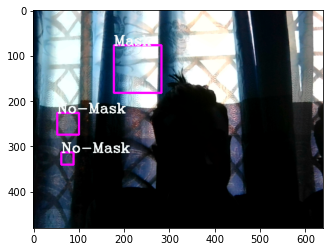

In [34]:
plt.imshow(img)